In [37]:
import numpy as np
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

In [38]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)
print(X[:5])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

(506, 104)
[[  0.00000000e+00   1.80000000e-01   6.78152493e-02   0.00000000e+00
    3.14814815e-01   5.77505269e-01   6.41606591e-01   2.69203139e-01
    0.00000000e+00   2.08015267e-01   2.87234043e-01   1.00000000e+00
    8.96799117e-02   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   3.24000000e-02   1.22067449e-02
    0.00000000e+00   5.66666667e-02   1.03950948e-01   1.15489186e-01
    4.84565650e-02   0.00000000e+00   3.74427481e-02   5.17021277e-02
    1.80000000e-01   1.61423841e-02   4.59890803e-03   0.00000000e+00
    2.13492451e-02   3.91636638e-02   4.35107109e-02   1.82560780e-02
    0.00000000e+00   1.41066072e-02   1.94788482e-02   6.78152493e-02
    6.08166557e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.000

In [39]:
print("training set score: %f" % lr.score(X_train, y_train))
print("test set score: %f" % lr.score(X_test, y_test))

training set score: 0.952353
test set score: 0.605775


his is a clear sign of overfitting, there are many approaches to overcome overfitting and key idea behind the idea of overfitting is to simplify the model and therefore we should try to find a model that allows us to control complexity. 

###### Regularization
It is an approach where an additional parameter is added to the cost function to “punish” the loss function for high values of the coefficients.

###### Ridge Regression
Ridge regression is also a linear model for regression devised as an extension for Linear Regression, so the formula it uses to make predictions is still formula as for Linear Regression. In Ridge regression,the coefficients w are chosen not only so that they predict well on the training data, but there is an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to 0. 

$$ S(w, b) = \sum_{i=1}^n|Y_i - \widehat{Y_i}|^2 + \lambda \sum_{i=1}^m|w_i|^2 $$

The λ parameter is a scalar that should be learned as well, using a method called cross validation. A super important fact we need to notice about ridge regression is that it enforces the coefficients to be lower, but it does not enforce them to be zero. That is, it will not get rid of irrelevant features but rather minimize their impact on the trained model. Mathematically, Ridge penalizes the l2 norm of the coefficients, or the Euclidean length of w

In [40]:
from sklearn.linear_model import Ridge

In [41]:
ridge = Ridge().fit(X_train, y_train)
print("training set score: %f" % ridge.score(X_train, y_train))
print("test set score: %f" % ridge.score(X_test, y_test))

training set score: 0.886058
test set score: 0.752714


Ridge is a more restricted model, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization. The Ridge model makes a trade-off between the simplicity of the model (near zero
coefficients) and its performance on the training set. Now this importance can be specified by the user using the **lambda** parameter. But remember that increasing values of **lambda** forces coefficients to move towards zero, which decreases training set performance. 

In [42]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("training set score: %f" % ridge10.score(X_train, y_train))
print("test set score: %f" % ridge10.score(X_test, y_test))

training set score: 0.788346
test set score: 0.635897


For very small values of **lambda**, coefficients are barely restricted at all, and we end up with a model that resembles LinearRegression

In [56]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("training set score: %f" % ridge01.score(X_train, y_train))
print("test set score: %f" % ridge01.score(X_test, y_test))

training set score: 0.928578
test set score: 0.771793


We can also get a more qualitative insight into how the lambda parameter changes the model by inspecting the coefficients models with different values of lambda . A higher lambda means a more restricted model, so we expect that the entries of coefficients have smaller magnitude for a high value of lambda than for a low value of lambda.

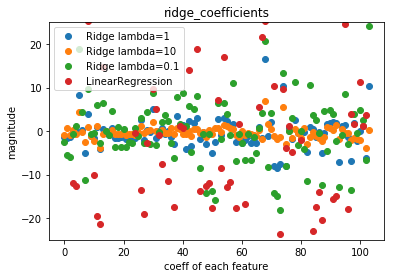

In [50]:
plt.title("ridge_coefficients")
plt.xlabel("coeff of each feature")
plt.ylabel("magnitude")
plt.plot(ridge.coef_, 'o', label="Ridge lambda=1")
plt.plot(ridge10.coef_, 'o', label="Ridge lambda=10")
plt.plot(ridge01.coef_, 'o', label="Ridge lambda=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.ylim(-25, 25)
plt.legend()

The main take-away here is that for lambda=10 (as shown by the orange dots), the coefficients are mostly between around -3 and 3. The coefficients for the ridge model with lambda=1 (as shown by the blue dots), are somewhat larger. The red dots have larger magnitude still, and many of the teal dots, corresponding to linear regression without any regularization (which would be lambda=0) are so large they are even outside of the chart

###### Lasso Regression
An alternative to Ridge for regularizing linear regression is the Lasso. The lasso also restricts coefficients to be close to zero, similarly to Ridge regression, but in a slightly different way. Lasso penalizes the absolute values of the coefficients in other words the L1 norm of the coefficient vector.

As a consequence some coefficients are exactly zero due to which some features are ignored completely.  This can
be seen as a form of automatic feature selection. Having some coefficients be exactly zero often makes a model easier to interpret, and can reveal the most important features of your model.

In [51]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("training set score: %f" % lasso.score(X_train, y_train))
print("test set score: %f" % lasso.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso.coef_ != 0))

training set score: 0.293238
test set score: 0.209375
number of features used: 4


This shows that our model has been underfitting the data. As we can see that it has used only 4 features out of 104.

In Lasso also we have a regularization parameter **lambda** that controls how strongly coefficients are pushed towards zero. Above, we used the default of lambda=1.0 . To diminish underfitting, we can decrease **lambda**

$$S(w, b) = \sum_{i=1}^n|Y_i - \widehat{Y_i}|^2 + \lambda \sum_{i=1}^m|w_i|$$

In [52]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("training set score: %f" % lasso001.score(X_train, y_train))
print("test set score: %f" % lasso001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso001.coef_ != 0))

training set score: 0.896408
test set score: 0.767806
number of features used: 32


/home/rajesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


A lower regularization paramter allowed us to fit a more complex model, which worked better on the training and the test data. The performance is slightly better than using Ridge, and we are using only 32 of the 104 features. This makes this model potentially easier to understand. But If we set lambda too low, we again remove the effect of regularization and end up with a result similar to LinearRegression.

In [53]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("training set score: %f" % lasso00001.score(X_train, y_train))
print("test set score: %f" % lasso00001.score(X_test, y_test))
print("number of features used: %d" % np.sum(lasso00001.coef_ != 0))

training set score: 0.942433
test set score: 0.695635
number of features used: 100


/home/rajesh/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


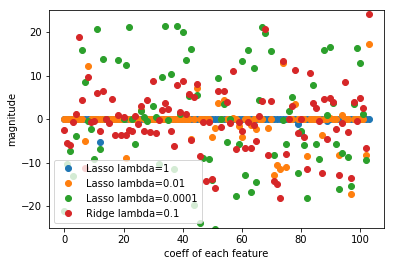

In [54]:
plt.xlabel("coeff of each feature")
plt.ylabel("magnitude")
plt.plot(lasso.coef_, 'o', label="Lasso lambda=1")
plt.plot(lasso001.coef_, 'o', label="Lasso lambda=0.01")
plt.plot(lasso00001.coef_, 'o', label="Lasso lambda=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge lambda=0.1")
plt.ylim(-25, 25)
plt.legend()

For lambda=1, with coefficients shown as blue dots, we not only see that most of the coefficients are zero (which we already knew), but that the remaining coefficients are also small in magnitude. Decreasing lambda to 0.01 we obtain the solution shown as the orange dots, which causes most features be exactly zero. Using lambda=0.00001, we get a model that is quite unregularized, with most coefficients nonzero and of large magnitude. For comparison, the best Ridge solution is shown in teal. The ridge model with lambda=0.1 has similar predictive performance as the lasso model with lambda=0.01, but using Ridge, all coefficients are non-zero.

Based on the level of simplicity and number of features intended to build the algorithm, one has to choose among Ridge and Lasso